# 1.import library

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow  as tf
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random

from keras.preprocessing.image import ImageDataGenerator


# 2.load data

In [12]:

data = tf.keras.utils.image_dataset_from_directory('Dataset')
data_iter=data.as_numpy_iterator()
batch=data_iter.next()

Found 52000 files belonging to 2 classes.


# 3.plot data

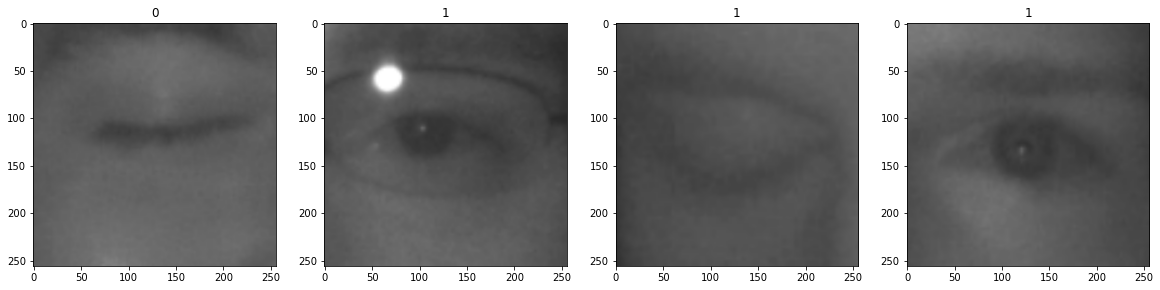

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][4:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3.sclae data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.44313726, 0.44313726, 0.44313726],
          [0.4426394 , 0.4426394 , 0.4426394 ],
          [0.4410003 , 0.4410003 , 0.4410003 ],
          ...,
          [0.25133273, 0.25133273, 0.25133273],
          [0.24805453, 0.24805453, 0.24805453],
          [0.24705882, 0.24705882, 0.24705882]],
 
         [[0.44413295, 0.44413295, 0.44413295],
          [0.44357193, 0.44357193, 0.44357193],
          [0.44172472, 0.44172472, 0.44172472],
          ...,
          [0.25178584, 0.25178584, 0.25178584],
          [0.24892384, 0.24892384, 0.24892384],
          [0.24805453, 0.24805453, 0.24805453]],
 
         [[0.44741115, 0.44741115, 0.44741115],
          [0.44664198, 0.44664198, 0.44664198],
          [0.44410974, 0.44410974, 0.44410974],
          ...,
          [0.2532777 , 0.2532777 , 0.2532777 ],
          [0.25178584, 0.25178584, 0.25178584],
          [0.25133273, 0.25133273, 0.25133273]],
 
         ...,
 
         [[0.29446998, 0.29446998, 0.29446998],
          [0.29347

# 4.split data

In [16]:
type(int(len(data)*.7))

int

In [19]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [20]:
train = data.take(train_size)
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
test=data.take(test_size)
len(test)


325

In [22]:
val =data.take(val_size)

In [23]:
len(val)

325

# 5.bulid model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [27]:
hist = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
  2/975 [..............................] - ETA: 1:08:58 - loss: 0.7340 - accuracy: 0.4844

KeyboardInterrupt: 

In [28]:
new_modle=load_model('model.h5')

NameError: name 'load_model' is not defined

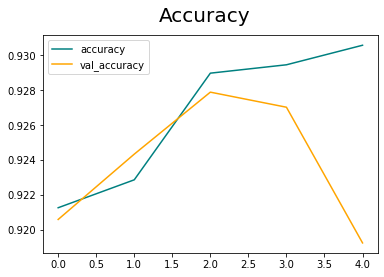

In [146]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [9]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'plt' is not defined

In [149]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
pre = Precision()
re = Recall()

acc = BinaryAccuracy()

NameError: name 'Precision' is not defined

In [1]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

NameError: name 'test' is not defined

In [47]:
print(pre.result())

tf.Tensor(0.9381402, shape=(), dtype=float32)


In [48]:

acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.91884613>

In [49]:
re.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.97617555>

In [3]:
import cv2

In [4]:
img = cv2.imread('Dataset/test/Closed_Eyes/s0016_00158_1_0_0_0_1_01.png')
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

In [5]:
resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()
resize/255

NameError: name 'tf' is not defined

In [6]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

NameError: name 'model' is not defined

In [7]:
if yhat>5:
    print('closed eay')
else:
    print('open eay')

NameError: name 'yhat' is not defined

In [81]:
model.save('model.h5')

In [82]:
new_modle=model.load_weights('model.h5')

In [8]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [124]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 48ms/step


array([[0.]], dtype=float32)

In [62]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [98]:
new_modle=load_model('model.h5')

In [99]:
new_modle

In [117]:
pre=new_modle.predict(np.expand_dims(resize/255, 0))
(pre[0][0])
if pre[0][0]

1/1 [==============================] - 0s 48ms/step


0.83393013